<a href="https://colab.research.google.com/github/MetaDev/MobilePose-pytorch/blob/master/webcam_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
import cv2
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [0]:

# I have no idea who is the author of the code
# in this cell that saves an image from a webcam
# inside google colab.
# It comes from a notebook called "📸 Take a photo with your webcam"

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

In [0]:
# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:

  while(True):

    # Capture frame-by-frame
    frame=take_photo()
    print(frame)
    if not ret:
        # Release the Video Device if ret is false
      vid.release()
        # Message to be displayed after releasing the device
    #             print "Released Video Resource"
      break

    # Convert the image from OpenCV BGR format to matplotlib RGB format
    # to display the image
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Turn off the axis
    axis('off')
    # Title of the window
    title("Input Stream")
    # Display the frame
    imshow(frame)
    show()
  # Display the frame until new frame is available
    clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
#     print "Released Video Resource"

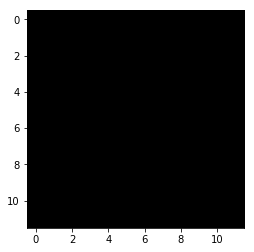